In [1]:
import numpy as np
import util
from SoftmaxRegression import SoftmaxRegression

## 1. Data Loading 

In [2]:
classification_train_data = util.load_data("./data/classification_train_data.pkl")
classification_train_label = util.load_data("./data/classification_train_label.pkl")
classification_test_data = util.load_data("./data/classification_test_data.pkl")

## 2. Data Exploration

In [3]:
print("Classification Train Data Shape:", classification_train_data.shape)
print("Classification Train Label Shape:", classification_train_label.shape)
print("Classification Test Data Shape:", classification_test_data.shape)

Classification Train Data Shape: (49976, 257)
Classification Train Label Shape: (49976, 2)
Classification Test Data Shape: (9997, 257)


## 3. Data Preprocessing

In [4]:
# remove index column
train_data_index = classification_train_data[:, 0]
train_label_index = classification_train_label[:, 0]
test_data_index = classification_test_data[:, 0]
classification_train_data = classification_train_data[:, 1:]
classification_train_label = classification_train_label[:, 1:].reshape(-1)
classification_test_data = classification_test_data[:, 1:]

In [5]:
classification_train_data.shape, classification_train_label.shape, classification_test_data.shape

((49976, 256), (49976,), (9997, 256))

In [6]:
train_data_index.shape, train_label_index.shape, test_data_index.shape

((49976,), (49976,), (9997,))

In [7]:
# normalization

# calculate the mean and standard deviation of each column
mean = np.mean(classification_train_data, axis=0)
std_dev = np.std(classification_train_data, axis=0)

# Z-Score normalizes each column
classification_train_data = (classification_train_data - mean) / std_dev
classification_test_data = (classification_test_data - mean) / std_dev

In [8]:
# label one-hot encoding
num_classes =  10 
classification_train_label = np.eye(num_classes)[classification_train_label]
print("train label shape:", classification_train_label.shape)

train label shape: (49976, 10)


## 4. Dataset Splitting

In [9]:
# divide the data set into training set and validation set
train_ratio = 0.8
seed = 123
(train_data, train_labels), (validation_data, validation_labels) = util.split_train_validation(
    classification_train_data, classification_train_label,
    train_ratio=train_ratio, random_seed=seed
    )

In [10]:
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape


((39980, 256), (39980, 10), (9996, 256), (9996, 10))

# 5. Model

In [11]:
class lrStep():
    def __init__(self, lr, step_point, coeff) -> None:
        self.lr = lr
        self.step_point = step_point
        self.coeff = coeff
        self.cnt = 0
        
    def step(self):
        self.cnt+=1
        if self.cnt in self.step_point:
            self.lr *= self.coeff

    def get_lr(self):
        return self.lr

steplizer = lrStep(lr=0.08, step_point=[6000,], coeff=1)

linear_model = SoftmaxRegression(
    num_classes=num_classes,
    # learning_rate=0.1,
    num_iterations=12000,
    random_seed=seed,
    lr_steplizer=steplizer
    )

# linear_model = util.load_data("model.pkl")
# linear_model.num_iterations=1000
# linear_model.lr_steplizer=steplizer
# linear_model


## 6. Train 

In [12]:


train_losses, val_losses, train_accuracies, val_accuracies = linear_model.fit(
    X_train=train_data, y_train=train_labels, 
    X_val=validation_data, y_val=validation_labels
    )



  0%|          | 8/12000 [00:00<15:27, 12.93it/s]

100%|██████████| 12000/12000 [10:17<00:00, 19.45it/s]


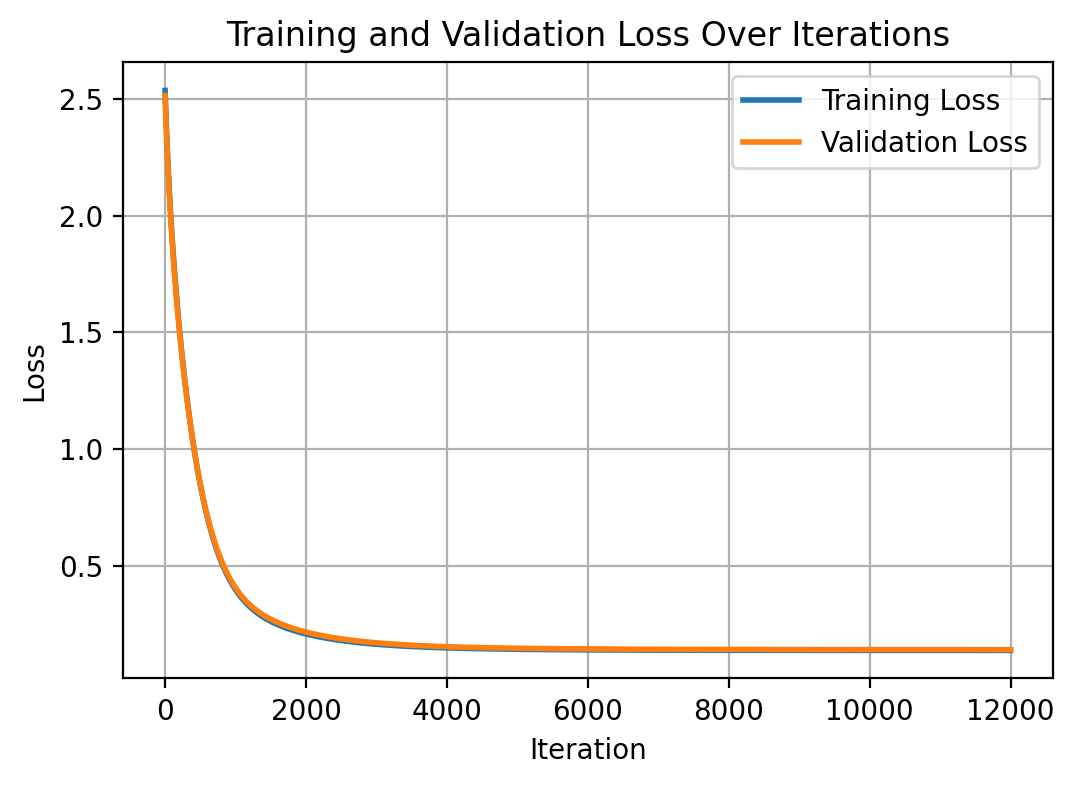

In [13]:
util.plot_loss_curves(train_losses=train_losses, val_losses=val_losses)

In [14]:
print(train_accuracies[-1])
print(val_accuracies[-1])



0.5293396698349174
0.5117046818727491


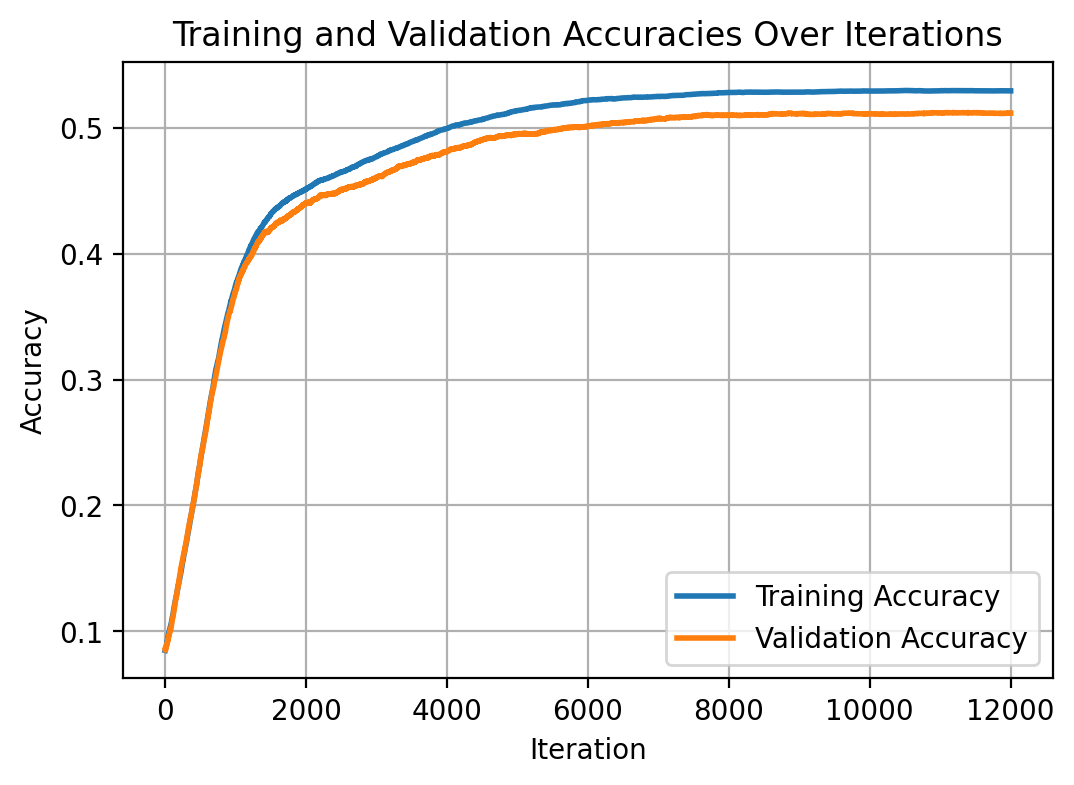

In [15]:
util.plot_acc_curves(train_acc=train_accuracies, val_acc=val_accuracies)

In [16]:
val_accuracies[-5:]

[0.5117046818727491,
 0.5117046818727491,
 0.5117046818727491,
 0.5117046818727491,
 0.5117046818727491]

## 7. Predict

In [17]:
test_label_predict = linear_model.predict(classification_test_data)

In [18]:
# merge index and corresponding classification results 
submit_data = np.hstack((
    test_data_index.reshape(-1, 1),
    test_label_predict.reshape(-1, 1)
    ))

In [19]:
submit_data.shape

(9997, 2)

In [21]:
util.save_data('./model.pkl', linear_model)
util.save_data('./classification_results.pkl', submit_data)

Saved successfully
Saved successfully
